CSU DSCI 369 Lab 8
Instructor: Emily J. King
Spring 2024

Goals:  Better understand autocorrleation and 2D cross-correlation / convolution.

Files needed: 
petedog-lab.png (or another image of your own choice)
autocorr.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from autocorr import autocorr

Autocorrelation

Let's make a random periodic vector.

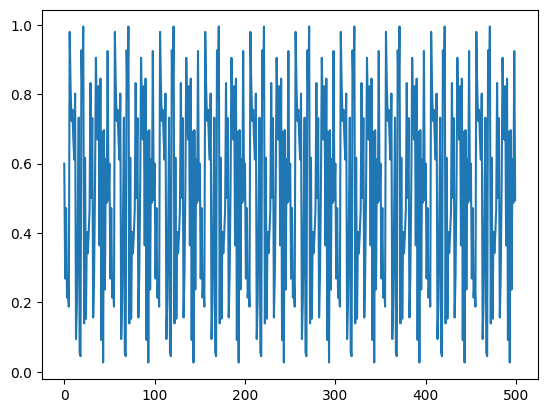

In [2]:
r=np.random.rand(50)
per=np.tile(r,10)
plt.plot(per)

Now let's add noise to hide the periodicity.


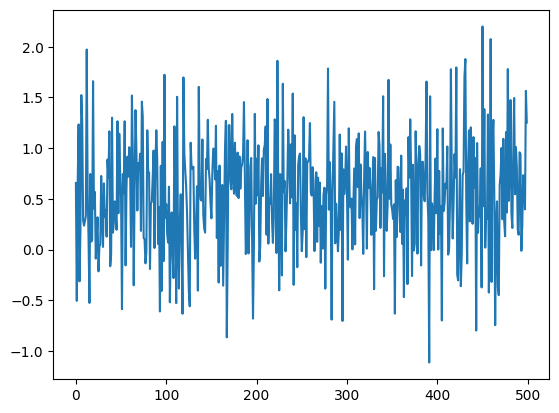

In [3]:
nper=per+0.5*np.random.normal(0,1,np.size(per))
plt.plot(nper)

Now let's compute the (cyclic) autocorrelation.  (The function defined might not look like the definition of autocorrelation from the class, but it is mathematically the same and a better implentation than directly encoding the formula.)

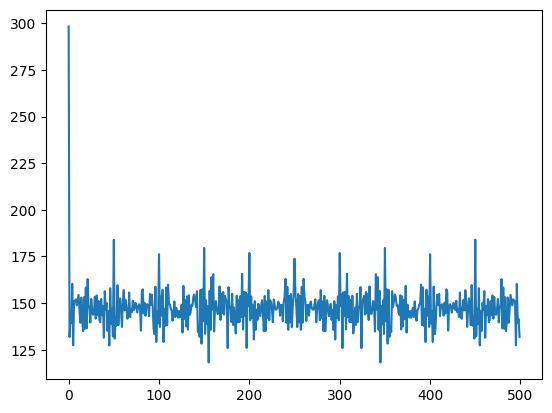

In [4]:
NPER=autocorr(nper)
plt.plot(NPER)

Discuss the output.

Convolving Pete Dog

Let's reload Pete Dog and look at him.  (You may also load another image of your choice by modifying the first command below.)

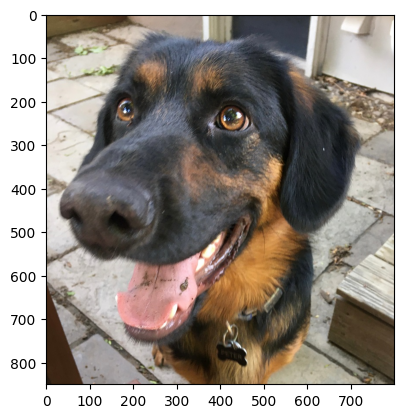

In [5]:
I=plt.imread('petedog-lab.png')
plt.imshow(I)

Let's add some noise.  Here, eta denotes the amount of noise ("noise level") and is a positive number where the larger the number, the more noise.  Remember that to add noise, we convert the image to double first.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


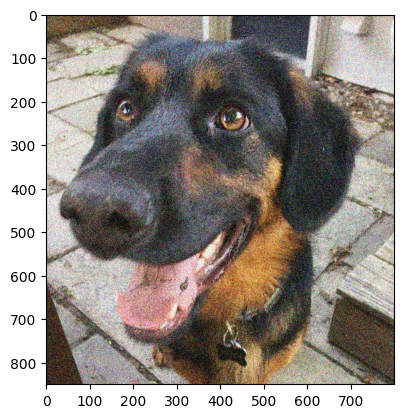

In [6]:
eta = 0.2
nI=I+eta*np.random.normal(0,1,size=I.shape)
plt.imshow(nI)

Let's apply various Gaussian blurring. Note from Scipy documentation: The default filter size is 2*round(4*sigma)+1. So setting sigma to 0.25 results in a 3x3 and to 0.5 results in a 5x5.

Try sigma = 0.25, 0.5, 1, 2.5, 5.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


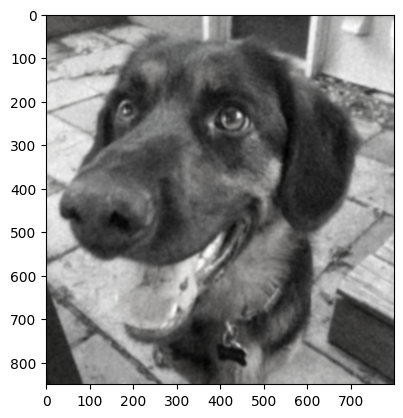

In [15]:
plt.imshow(scipy.ndimage.gaussian_filter(nI, sigma=2.5))

Let's compute the cross correlation with the Sobel filter for horizontal edges.  For ease of visualization, we'll first convert the color image to a grayscale.  Note that scipy.ndimage.sobel(bwI, 1) yields the cross correlation of the Sobel filter for horizontal edges.


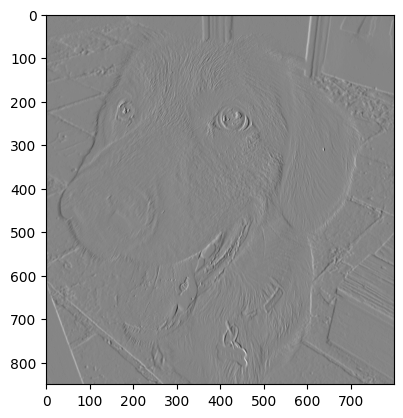

In [10]:
bwI=0.2989 * I[:,:,0] + 0.5870 * I[:,:,1] + 0.1140 * I[:,:,2] 
plt.imshow(scipy.ndimage.sobel(bwI, 1),cmap='gray')

And now for vertical edges.

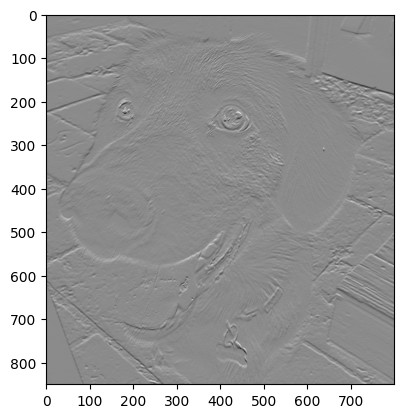

In [11]:
plt.imshow(scipy.ndimage.sobel(bwI, 0),cmap='gray')


Exercises

1. Which of the sigma values used in the Gaussian blurring gave the "best" result?  (Note: There is no correct answer here, but you must justify your answer to get any credit.)

A sigma value of 2.5 seems to give the best result because it appears to make the image black and white and sufficiently removes noise. The sigma values greater than or less than 2.5 either don't remove the noise or (in the case of 5) make the image far too blurry to retain information about edges.

2. Create the following image.

In [16]:
A=np.hstack((np.ones([500,250]), np.zeros([500,250])))

a. Visualize A.  (If you want grayscale visualization, you cmap='gray' as above.)

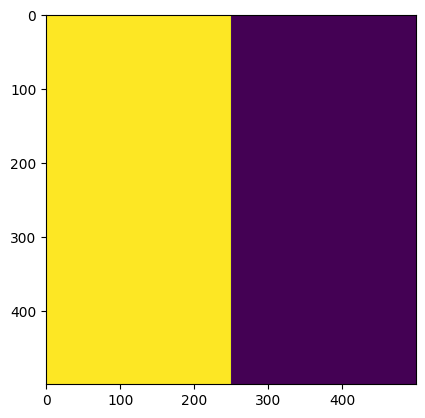

In [23]:
plt.imshow(A)

b. Choose a sigma level and perform a Gaussian filter on A. Visualize the output.

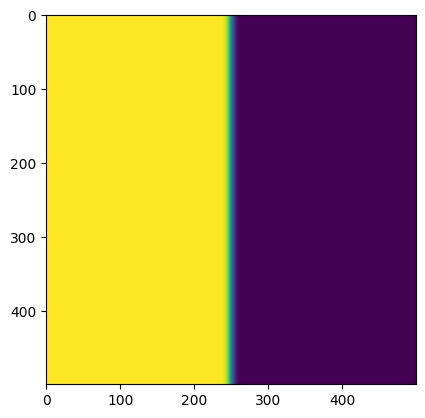

In [24]:
plt.imshow(scipy.ndimage.gaussian_filter(A, sigma=5))

c. Explain why the output of b makes sense.


This output makes sense because a Gaussian filter effectively blurs an image.  Since the only edge in the image is the vertical line down the center, this is the only place where the blur is effective.  Blurring a solid color has no effect.

d. Compute the cross correlation of A with the Sobel filter for horizontal edges. Visualize the output.


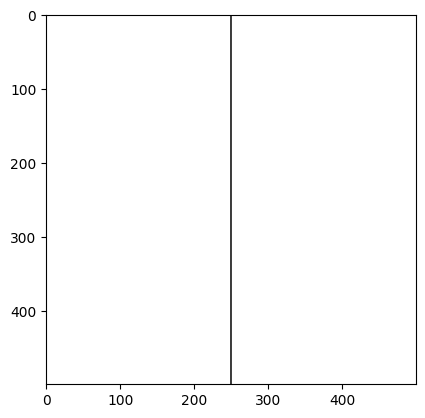

In [19]:
plt.imshow(scipy.ndimage.sobel(A, 1),cmap='gray')

e. Explain why the output of d makes sense


This output makes sense because A is two rectangles next to eachother.  The only edge in the image is a horizontal edge in the middle, so it makes sense that it is the only thing that would be picked up by a cross correlation of A and a horizontal Sobel filter.

f. Compute the cross correlation of A with the Sobel filter for vertical edges. Visualize the output.


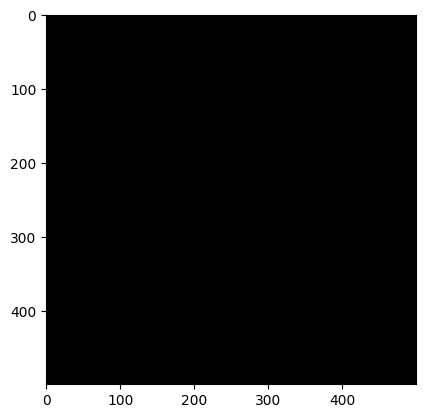

In [20]:
plt.imshow(scipy.ndimage.sobel(A, 0),cmap='gray')

g. Explain why the output of f makes sense.

Similarly to this other Sobel filter cross correlation, this output makes sense because there are no vertical edges between the two rectangles in the image.  Their only edge is the vertical line in the middle of the image, which would not be picked up by a Sobel filter for vertical edges.